## PIO
### Projekty 3/4 [100 pkt]

Proszę użyć tego arkusza do programowania. Na początek proszę zmienić 'nazwisko_imie' na Państwa nazwisko i imie, bez polskich znaków diakrytycznych.

Jak już Państwo zaprogramują wszystko, proszę zapisać arkusz (File->Save and Checkpoint) oraz zapisać arkusz na dysk (File->Download as->Notebook). Ten plik proszę wgrać na classroom. 

**Uwaga** Przed oddaniem pliku warto zrestartować kernel Python-a, i uruchomić wszystkie komórki ręcznie, patrząc czy wszystko jest OK. Błędy rzucane przez interpreter spowodują 0 punktów.

In [1]:
# współpraca:
# czas spędzony nad projektem:

### Projekt 3
Pobierz wszystkie komiksy z witryny XKCD. Przykład projektu rozwiązania
* Wczytanie strony głównej XKCD.
* Zapisanie obrazu zawierającego komiks opublikowany na danej stronie.
* Przejście na stronę wskazywaną przez łącze Previous Comic.
* Powtarzanie operacji, dopóki nie zostanie pobrany najstarszy komiks.


In [39]:
import urllib.request as urllib2
from requests import get
import os

def fetchJSON(comic_number):
        if comic_number < 0:
            return None
        try:
            if comic_number == 0:
                return get("http://xkcd.com/info.0.json").json()
            else:
                return get("http://xkcd.com/{0}/info.0.json".
                           format(comic_number)).json()
        except Exception as err:
            print(f"{type(err).__name__} was raised: {err}") 
            return None

def fetchImage(comic_number, path):
        images = []
        if comic_number == 404:
            print("strip #404 is not available")
            return
        else:
            info = fetchJSON(comic_number)
            if not info:
                print("Error: URL could not be retrieved")
                return
        
            title, alt, num, src = info['safe_title'], info['alt'], str(info['num']), info['img']
            filename = src.rsplit('/', 1)[-1]
            
            try:
                print("Fetching strip #{} -> {}".format(comic_number, os.getcwd()+'\\'+path+filename))
                urllib2.urlretrieve(src, path+filename)
            except Exception as err:
                print(f"{type(err).__name__} was raised: {err}")
                print(src, path+filename)
    
def fetchXKCD(comic_number=None, path='XKCD\\'):
    if not(os.path.exists(path)):
        os.makedirs(path)
        print("Directory {} created (current working directory: {}). ".format( path, os. getcwd() ))
    if (comic_number is not None):
        fetchImage(comic_number, path)
    else:
        latestStrip = fetchJSON(0)['num']
        print("No number specified, fetching all {} strips".format(latestStrip))
        for i in range(1, latestStrip+1):
            fetchImage(i, path)

fetchXKCD(22)


Fetching strip #22 -> C:\Users\User\Downloads\XKCD\barrel_whirlpool.jpg


### Projekt 4
Opracuj statystykę Lotto. Podaj, które 6 liczb najczęściej losowano w ostatnich N latach. Wynik zaprezentuj w zarówno w tabelce jak i graficznie.

* https://megalotto.pl/wyniki/lotto
* https://matplotlib.org/

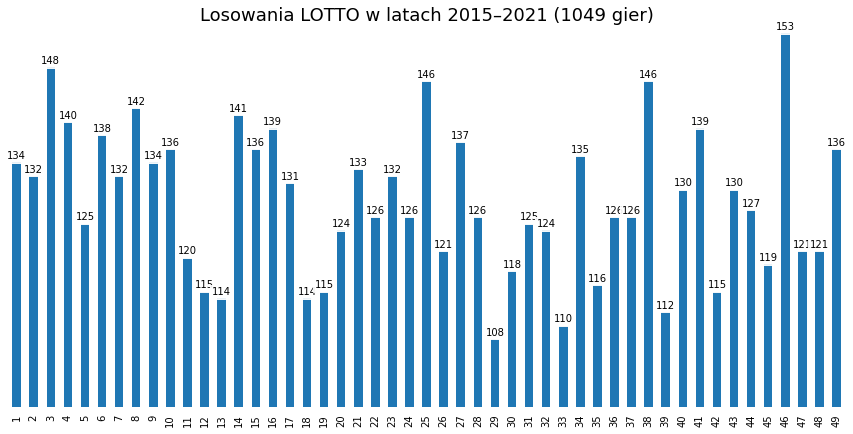

,2015,2016,2017,2018,2019,2020,2021,Total
1,17,11,18,26,23,25,14,134
2,21,24,20,17,19,15,16,132
3,23,22,20,19,24,20,20,148
4,24,20,22,25,19,18,12,140
5,20,23,14,17,20,16,15,125
6,20,22,27,16,24,20,9,138
7,18,33,18,17,21,18,7,132
8,18,23,21,20,27,18,15,142
9,19,20,19,22,27,16,11,134
10,17,17,19,24,20,23,16,136


In [40]:
import urllib.request as urllib2
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import date
import pandas

def fetchLottos(N, OUTPUT='TABLE'):
    currentYear = date.today().year
    firstLotto = 1957
    firstYear = currentYear-N
    
    if(firstYear<firstLotto):
        raise Exception('N>={0}'.format(currentYear-firstLotto))
        
    results=[]
    for i in range(firstYear,currentYear+1):
        url = "https://megalotto.pl/wyniki/lotto/losowania-z-roku-{0}".format(i)
        data = urllib2.urlopen(url)
        soup = BeautifulSoup(data, 'html.parser')
        
        yearlyResults = [0]*49
        for x in soup.findAll("li", {"class": "numbers_in_list"}):
            n=int(x.text.strip())
            yearlyResults[n-1]+=1
        results.append(yearlyResults)
    
    df = pandas.DataFrame(results, columns=range(1,50), index=range(firstYear, currentYear+1))
    if(OUTPUT=='PLOT'):
        
        fig, ax = plt.subplots(figsize = (15,7)) 
        plt.figure(1)
        
        x=list(df.keys())
        y=df.sum().T
        
        plt.title('Losowania LOTTO w latach {2}–{3} ({1} gier)'.format(N, int( sum(df.sum())/6 ), firstYear, currentYear), fontsize=18)
        ax.set_xticks(x)
        ax.set_yticks([])
        ax.set_ylim(min(df.sum())-10,max(df.sum())+1)
        ax.tick_params(left = False, bottom = False)
        for ax, spine in ax.spines.items():
            spine.set_visible(False)
        y.plot(kind = "bar")
        for k,v in y.items():
            plt.text(k-1,v+1,
                 str(v),
                 bbox={'facecolor':'white','alpha':0.9,'edgecolor':'white','pad':2},
                 ha='center', va='center')
        plt.close(1)
        return fig
    elif(OUTPUT=='TABLE'):
        df.loc['Total']= df.sum()
        return df.T
        
    return df.T
display(fetchLottos(6, OUTPUT='PLOT'))

display(fetchLottos(6, OUTPUT='TABLE'))

In [ ]:
# way to install packages correctly
import sys
!{sys.executable} -m pip install scipy